In [ ]:
%matplotlib inline
# do the imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.ensemble import BaggingRegressor
import seaborn as sns
from keras.optimizers import SGD

In [ ]:
# function that creates our model
def createRegressionNetwork(hidden_layer_combinations):
  model = tf.keras.models.Sequential()

  model.add(Dense(32, activation="relu", input_shape=(6,)))
  model.add(Dropout(0.3))

  for layer in hidden_layer_combinations:
    model.add(Dense(layer, activation='relu'))
    model.add(Dropout(0.3))

  model.add(Dense(1, activation='linear'))

  # compile with MSE as the loss
  # adam and mae as a metric
  model.compile(
      optimizer = SGD(),
      loss = "mean_squared_error",
      metrics = ['mae']
  )
  return model


In [ ]:
# read in the data into a data frame and print
raw_data = pd.read_csv(r'/content/sample_data/train.csv')
# print(raw_data.head())

# assert that the flag is equal to false so that there are no nulls
# nulls will negatively impact the nerual network
null_flag = raw_data.isnull().any().any()
assert null_flag == False

features = raw_data.drop(columns=['Popularity', 'Genre']).values
genre = raw_data['Genre'].values
popularity_value = raw_data['Popularity'].values

# do encodings for the genres
label_encoder = LabelEncoder()
encoded_genres = label_encoder.fit_transform(genre)

# scale the features
scalar = StandardScaler()
scalar.fit(features)
features_scaled = scalar.transform(features)

# scale the popularity scores
scalar.fit(popularity_value.reshape(-1, 1))
popularity_scaled = scalar.transform(popularity_value.reshape(-1, 1))


# combine the encoded genres to the rest of the features
combined_features = np.column_stack((features_scaled, encoded_genres))

# make the kfold object, we will do a 3 fold cross validation
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
NN_histories = []
NN_preds = []
actuals = []
ensemble_preds = []
# passing the scaled data to the kfold split
# we can iterate through the train/test indexes
for train_idx, test_idx in kfold.split(popularity_scaled):

    # seperate the x from the y
    x_train, x_test = combined_features[train_idx], combined_features[test_idx]
    y_train, y_test = popularity_scaled[train_idx], popularity_scaled[test_idx]
    actuals.append(y_test)

    # create the regressive nerual network and fit the model
    model = createRegressionNetwork([128, 128, 128])
    history = model.fit(x_train, y_train, epochs=15, batch_size=16)
    predictions = model.predict(x_test)

    NN_histories.append(history)
    NN_preds.append(predictions)

    model = BaggingRegressor(n_estimators=10, random_state = 42, estimator=LinearRegression())
    model.fit(x_train, y_train)
    predictions2 = model.predict(x_test)

    ensemble_preds.append(predictions2)

Epoch 1/15
334/334 [==============================] - 5s 5ms/step - loss: 0.5358 - mae: 0.5745
Epoch 2/15
334/334 [==============================] - 2s 5ms/step - loss: 0.2443 - mae: 0.3850
Epoch 3/15
334/334 [==============================] - 2s 6ms/step - loss: 0.2011 - mae: 0.3487
Epoch 4/15
334/334 [==============================] - 2s 6ms/step - loss: 0.1779 - mae: 0.3315
Epoch 5/15
334/334 [==============================] - 1s 3ms/step - loss: 0.1618 - mae: 0.3117
Epoch 6/15
334/334 [==============================] - 1s 2ms/step - loss: 0.1553 - mae: 0.3062
Epoch 7/15
334/334 [==============================] - 1s 2ms/step - loss: 0.1496 - mae: 0.3016
Epoch 8/15
334/334 [==============================] - 1s 2ms/step - loss: 0.1366 - mae: 0.2894
Epoch 9/15
334/334 [==============================] - 1s 2ms/step - loss: 0.1358 - mae: 0.2864
Epoch 10/15
334/334 [==============================] - 1s 2ms/step - loss: 0.1282 - mae: 0.2797
Epoch 11/15
334/334 [============================

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Epoch 1/15
334/334 [==============================] - 1s 2ms/step - loss: 0.4683 - mae: 0.5367
Epoch 2/15
334/334 [==============================] - 1s 2ms/step - loss: 0.2409 - mae: 0.3863
Epoch 3/15
334/334 [==============================] - 1s 2ms/step - loss: 0.1955 - mae: 0.3448
Epoch 4/15
334/334 [==============================] - 1s 2ms/step - loss: 0.1726 - mae: 0.3265
Epoch 5/15
334/334 [==============================] - 1s 2ms/step - loss: 0.1671 - mae: 0.3213
Epoch 6/15
334/334 [==============================] - 1s 2ms/step - loss: 0.1514 - mae: 0.3052
Epoch 7/15
334/334 [==============================] - 1s 2ms/step - loss: 0.1447 - mae: 0.2982
Epoch 8/15
334/334 [==============================] - 1s 2ms/step - loss: 0.1387 - mae: 0.2906
Epoch 9/15
334/334 [==============================] - 1s 3ms/step - loss: 0.1288 - mae: 0.2783
Epoch 10/15
334/334 [==============================] - 1s 3ms/step - loss: 0.1282 - mae: 0.2804
Epoch 11/15
334/334 [============================

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Epoch 1/15
334/334 [==============================] - 1s 2ms/step - loss: 0.6026 - mae: 0.6137
Epoch 2/15
334/334 [==============================] - 1s 2ms/step - loss: 0.2686 - mae: 0.4062
Epoch 3/15
334/334 [==============================] - 1s 2ms/step - loss: 0.2123 - mae: 0.3596
Epoch 4/15
334/334 [==============================] - 1s 2ms/step - loss: 0.1944 - mae: 0.3425
Epoch 5/15
334/334 [==============================] - 1s 2ms/step - loss: 0.1729 - mae: 0.3244
Epoch 6/15
334/334 [==============================] - 1s 2ms/step - loss: 0.1606 - mae: 0.3104
Epoch 7/15
334/334 [==============================] - 1s 2ms/step - loss: 0.1523 - mae: 0.3042
Epoch 8/15
334/334 [==============================] - 1s 2ms/step - loss: 0.1471 - mae: 0.2995
Epoch 9/15
334/334 [==============================] - 1s 2ms/step - loss: 0.1419 - mae: 0.2921
Epoch 10/15
334/334 [==============================] - 1s 2ms/step - loss: 0.1311 - mae: 0.2823
Epoch 11/15
334/334 [============================

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


In [ ]:
def evaluate(actuals, predicted):
  MSE = []
  MAE = []

  for i, fold in enumerate(predicted):
    MAE.append(mean_absolute_error(actuals[i], fold))
    MSE.append(mean_squared_error(actuals[i], fold))

  for i, value in enumerate(MAE):
    print(f"Fold {i}:")
    print(f'MAE: {MAE[i]}')
    print(f'MAE: {MSE[i]}')
    print('-----')

print('Nerual Network Evaluations:')
evaluate(actuals, NN_preds)

print('Ensemble Learning Evaluations')
evaluate(actuals, ensemble_preds)

Nerual Network Evaluations:
Fold 0:
MAE: 0.3224488083170909
MAE: 0.16988893311666523
-----
Fold 1:
MAE: 0.30013262841963295
MAE: 0.14354561740180563
-----
Fold 2:
MAE: 0.28407817224418197
MAE: 0.1277681528728547
-----
Ensemble Learning Evaluations
Fold 0:
MAE: 0.185300527851892
MAE: 0.05316107439325264
-----
Fold 1:
MAE: 0.18891973195609257
MAE: 0.05667734268128834
-----
Fold 2:
MAE: 0.19090599618304016
MAE: 0.05703603295803685
-----


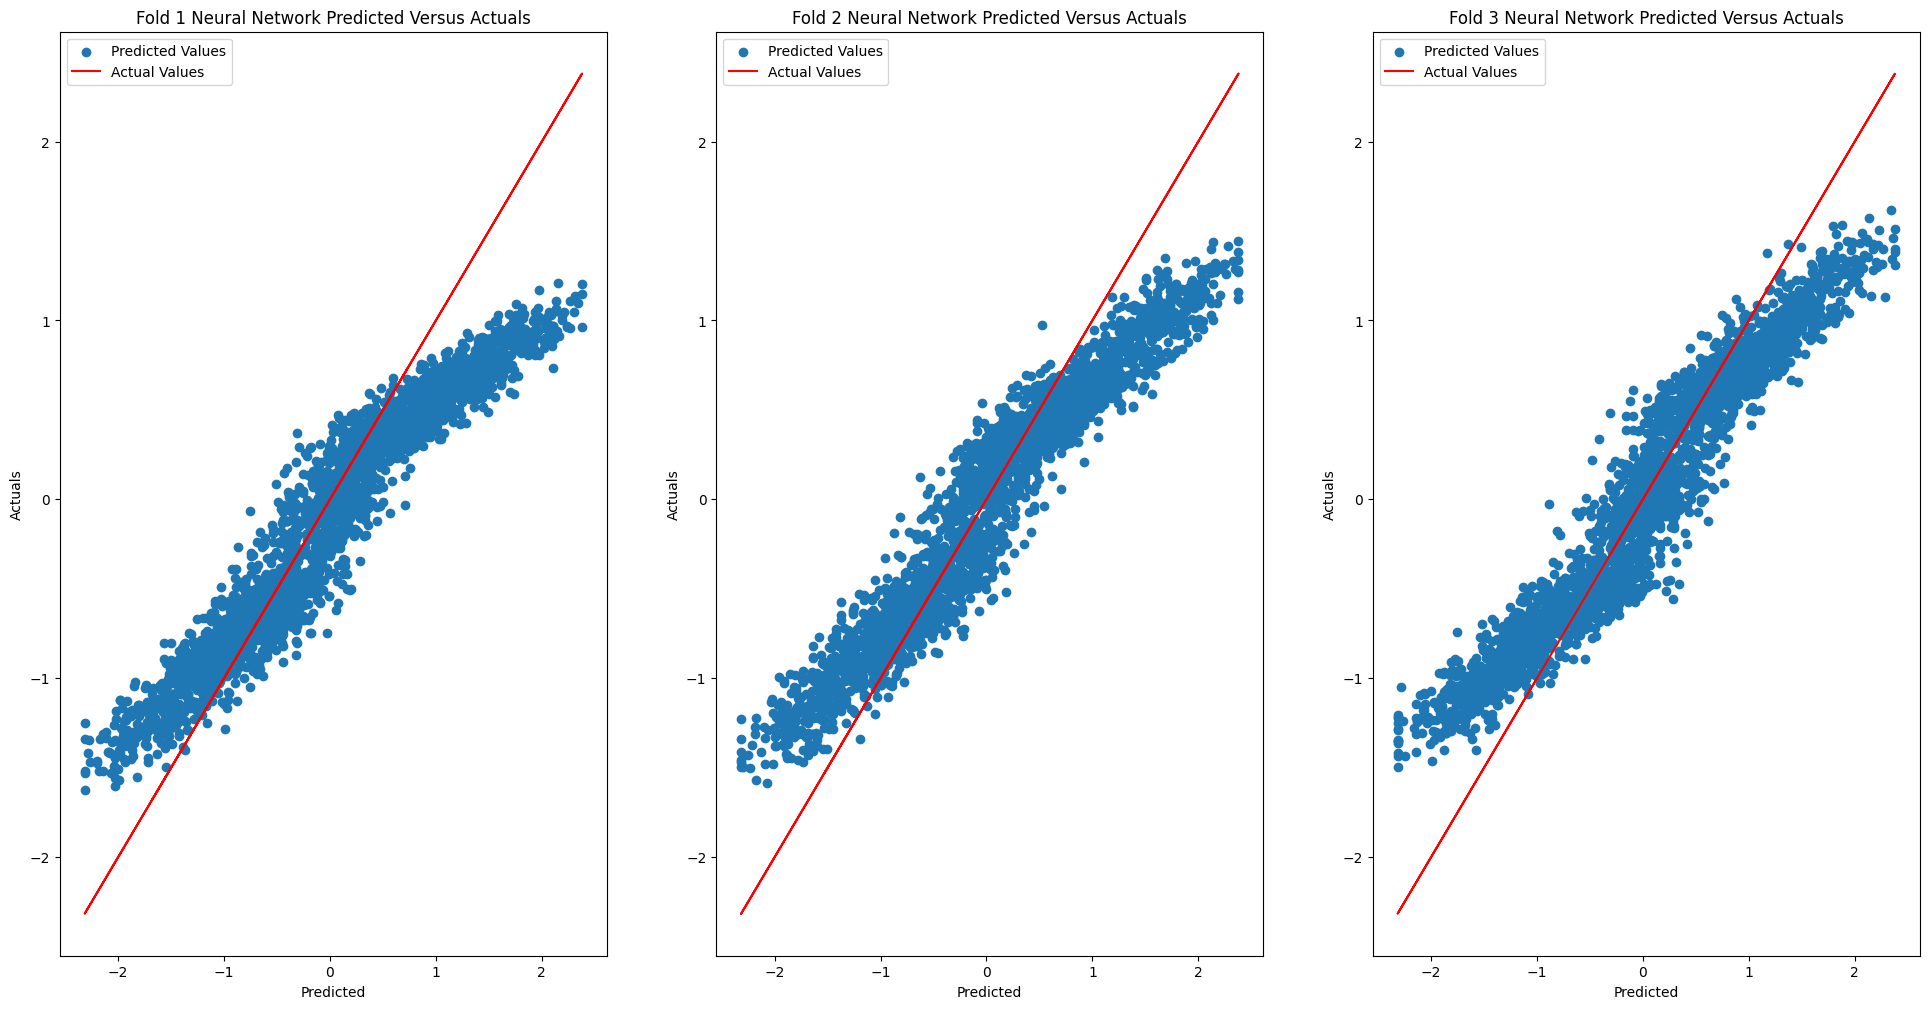

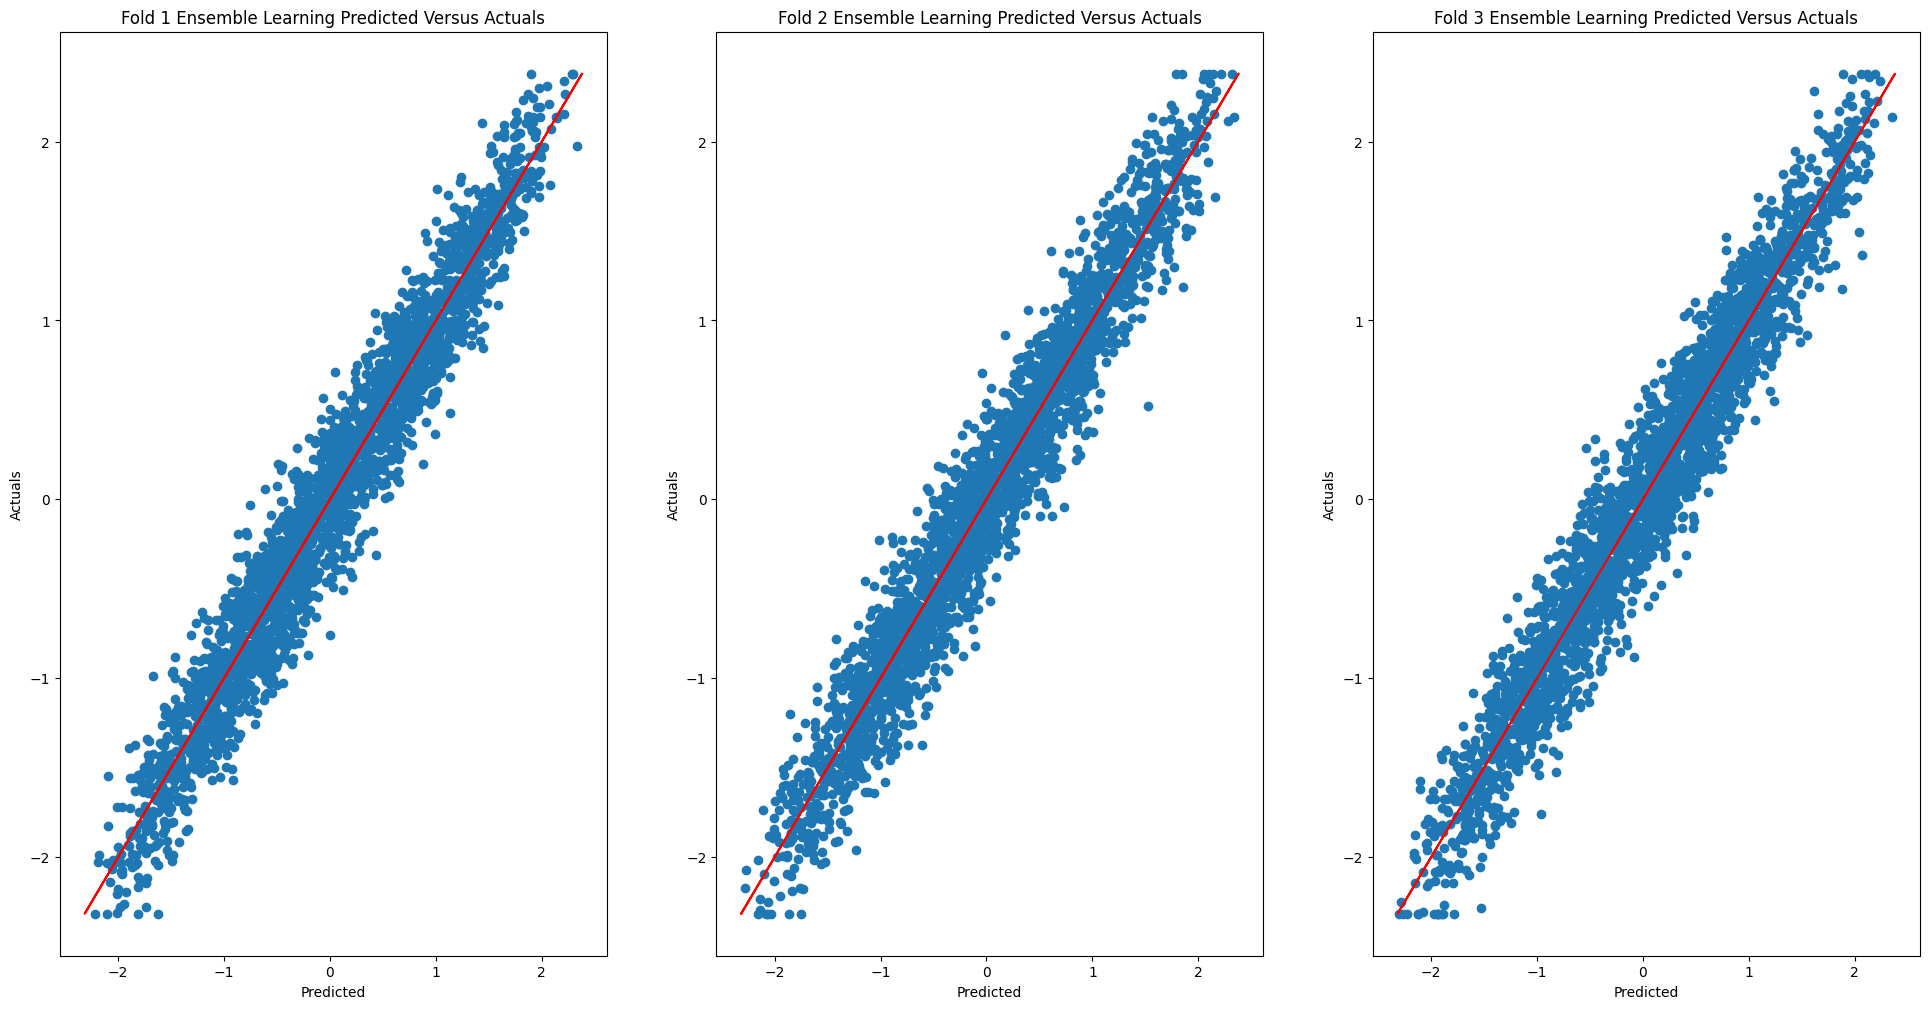

In [ ]:
def plotResults(actuals, NN_predicted, EN_predicted):
  rows = 1
  cols = 3

  fig, axes = plt.subplots(rows, cols, figsize=(24, 12))
  axes = axes.flatten()

  for i in range(cols):
    axis = axes[i]
    axis.scatter(actuals[i], NN_predicted[i], label = 'Predicted Values')
    axis.plot(actuals[i], actuals[i], color = 'red', label = 'Actual Values')

    axis.set_title(f"Fold {i+1} Neural Network Predicted Versus Actuals")
    axis.set_xlabel('Predicted')
    axis.set_ylabel('Actuals')
    axis.legend()

  fig2, axes2 = plt.subplots(rows, cols, figsize=(24, 12))
  axes2 = axes2.flatten()

  for i in range(cols):
    axis2 = axes2[i]
    axis2.scatter(EN_predicted[i], actuals[i])
    axis2.plot(actuals[i], actuals[i], color = 'red', label = 'Actual Values')

    axis2.set_title(f"Fold {i+1} Ensemble Learning Predicted Versus Actuals")
    axis2.set_xlabel('Predicted')
    axis2.set_ylabel('Actuals')
    axis.legend()

plotResults(actuals, NN_preds, ensemble_preds)

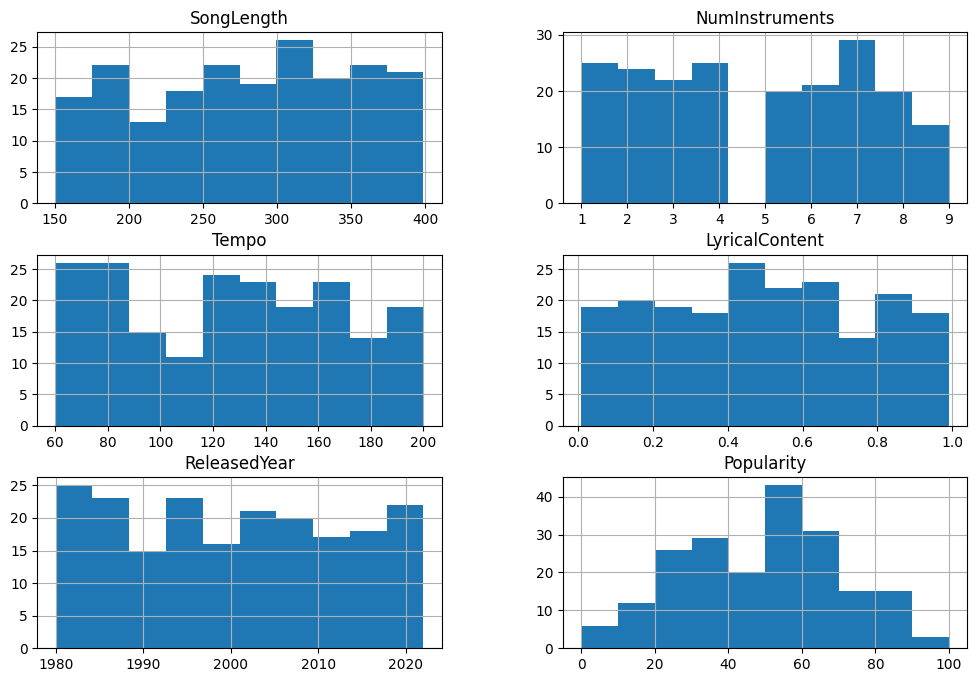

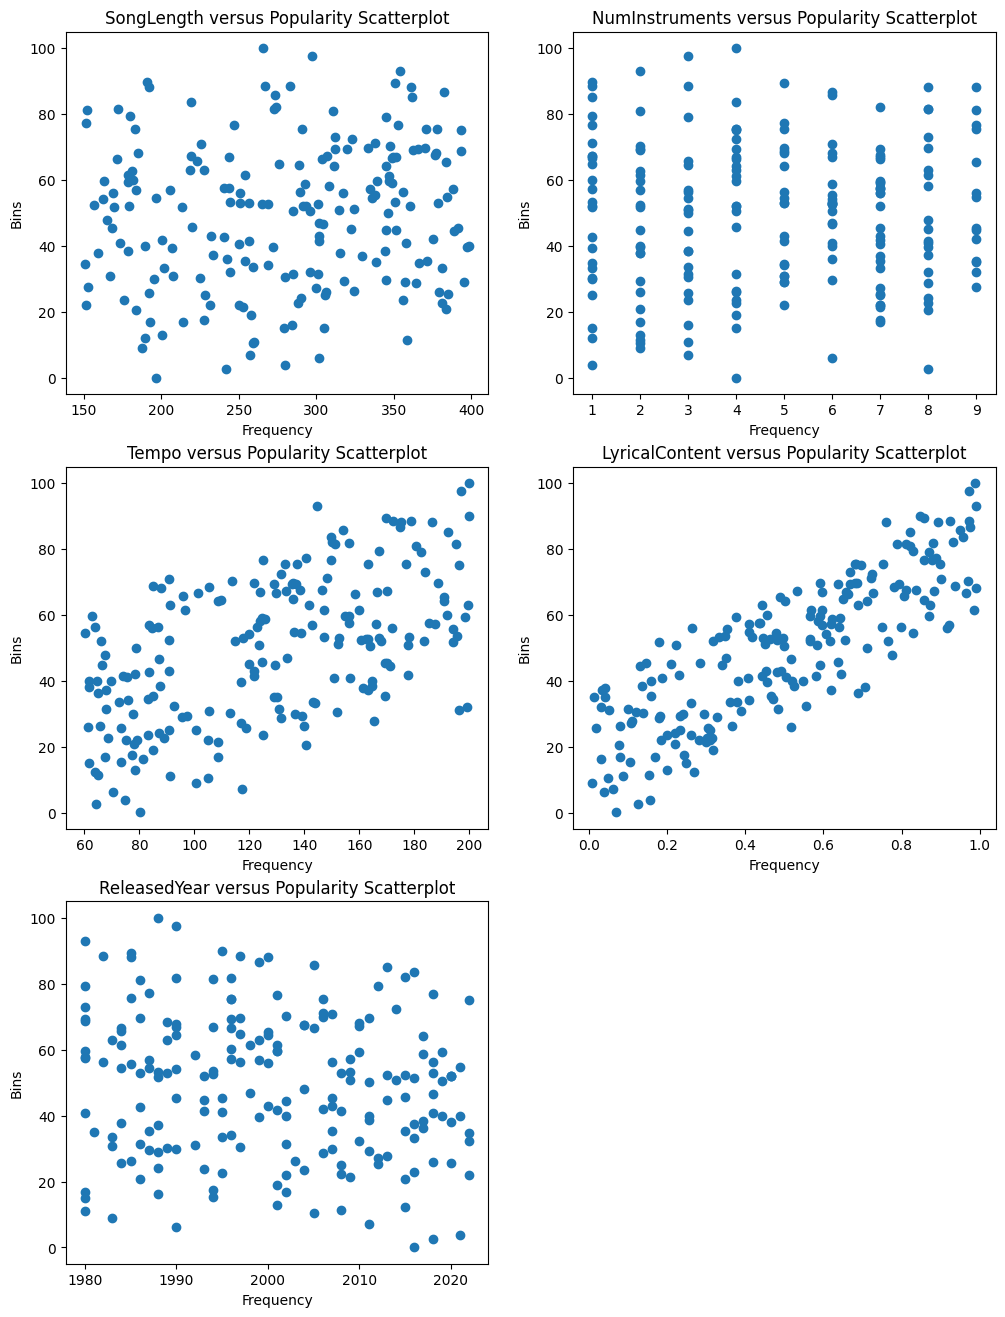

In [ ]:
def exploratory(path):

    # read in the data from the provided path argument
    data = pd.read_csv(path)
    # reduce the size by using the sample method
    # will maintain the distribuition so that the visualizations are more readable
    data = data.sample(frac=.025, random_state=42)

    # make the histograms but drop the genre column
    data.drop(columns=['Genre']).hist(figsize=(12, 8))
    plt.show()

    # seperate the features from the target popularity value
    features = data.drop(columns=['Popularity', 'Genre'])
    target = data['Popularity']

    # get the rows and columns we want
    rows = 3
    cols = 2
    fig, axes = plt.subplots(3, 2, figsize=(12, 16))

    # flatten the axes array so that we can access them as we iterate through
    axes = axes.flatten()

    axes[5].axis('off')
    # iterate through the enumeration of the columns so that we can plot each
    # of the features we got
    column_names = features.columns
    for i, column in enumerate(column_names):
      axis = axes[i]
      axis.scatter(data[column], data['Popularity'])
      axis.set_title(f"{column} versus Popularity Scatterplot")
      axis.set_xlabel('Frequency')
      axis.set_ylabel('Bins')




exploratory(r'/content/sample_data/train.csv')

Epoch 1/50
180/180 [==============================] - 4s 9ms/step - loss: 0.6778 - mae: 0.6617 - val_loss: 0.2353 - val_mae: 0.3878
Epoch 2/50
180/180 [==============================] - 1s 7ms/step - loss: 0.3585 - mae: 0.4729 - val_loss: 0.1390 - val_mae: 0.2931
Epoch 3/50
180/180 [==============================] - 1s 5ms/step - loss: 0.2756 - mae: 0.4108 - val_loss: 0.1320 - val_mae: 0.2873
Epoch 4/50
180/180 [==============================] - 1s 6ms/step - loss: 0.2280 - mae: 0.3737 - val_loss: 0.1201 - val_mae: 0.2730
Epoch 5/50
180/180 [==============================] - 1s 7ms/step - loss: 0.1996 - mae: 0.3503 - val_loss: 0.1208 - val_mae: 0.2744
Epoch 6/50
180/180 [==============================] - 1s 4ms/step - loss: 0.1901 - mae: 0.3418 - val_loss: 0.1239 - val_mae: 0.2779
Epoch 7/50
180/180 [==============================] - 1s 3ms/step - loss: 0.1748 - mae: 0.3257 - val_loss: 0.1227 - val_mae: 0.2775
Epoch 8/50
180/180 [==============================] - 1s 3ms/step - loss: 0.

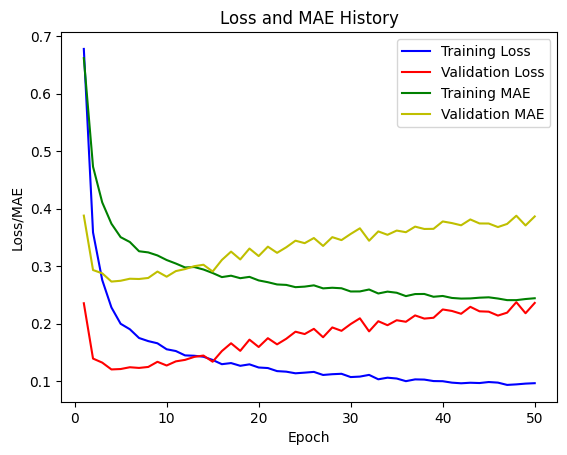

In [ ]:
def training_eval(features, target):
  x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.1, random_state=1, shuffle=True)

  model = createRegressionNetwork([128,128,128])
  history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split = .2)


  plt.figure()
  epochs = range(1, 51)
  plt.plot(epochs, history.history['loss'], 'b-', label='Training Loss')
  plt.plot(epochs, history.history['val_loss'], 'r-', label='Validation Loss')
  plt.plot(epochs, history.history['mae'], 'g-', label='Training MAE')
  plt.plot(epochs, history.history['val_mae'], 'y-', label='Validation MAE')
  plt.title("Loss and MAE History")
  plt.xlabel("Epoch")
  plt.ylabel("Loss/MAE")
  plt.legend()

training_eval(combined_features, popularity_scaled)

In [ ]:
def tuning(features, target):
    neuron_amounts = [32, 64, 128]
    layers_min = 3
    layers_max = 5

    combinations = []
    for layer_amount in range(layers_min, layers_max+1):
      for neuron_amount in neuron_amounts:
        current = []
        for i in range(0, layer_amount):
          current.append(neuron_amount)
        combinations.append(current)

    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.1, random_state=1, shuffle=True)
    evaluations = []
    for combination in combinations:
      model = createRegressionNetwork(combination)
      history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split = .2)
      evaluations.append(model.evaluate(x_test, y_test))

    for i, combination in enumerate(combinations):
      print(f"Combination {i+1}")
      print(evaluations[i])
      print(combinations[i])

tuning(combined_features, popularity_scaled)


Epoch 1/5
180/180 [==============================] - 3s 7ms/step - loss: 0.9253 - mae: 0.7832 - val_loss: 0.5560 - val_mae: 0.6106
Epoch 2/5
180/180 [==============================] - 1s 5ms/step - loss: 0.5572 - mae: 0.5931 - val_loss: 0.2405 - val_mae: 0.3901
Epoch 3/5
180/180 [==============================] - 1s 5ms/step - loss: 0.4217 - mae: 0.5105 - val_loss: 0.1857 - val_mae: 0.3433
Epoch 4/5
180/180 [==============================] - 1s 6ms/step - loss: 0.3585 - mae: 0.4644 - val_loss: 0.1630 - val_mae: 0.3226
Epoch 5/5
25/25 [==============================] - 0s 2ms/step - loss: 0.1602 - mae: 0.3200
Epoch 1/5
180/180 [==============================] - 1s 4ms/step - loss: 0.7865 - mae: 0.7196 - val_loss: 0.3073 - val_mae: 0.4433
Epoch 2/5
180/180 [==============================] - 0s 3ms/step - loss: 0.4322 - mae: 0.5165 - val_loss: 0.1910 - val_mae: 0.3478
Epoch 3/5
180/180 [==============================] - 0s 3ms/step - loss: 0.3183 - mae: 0.4418 - val_loss: 0.1353 - val_mae

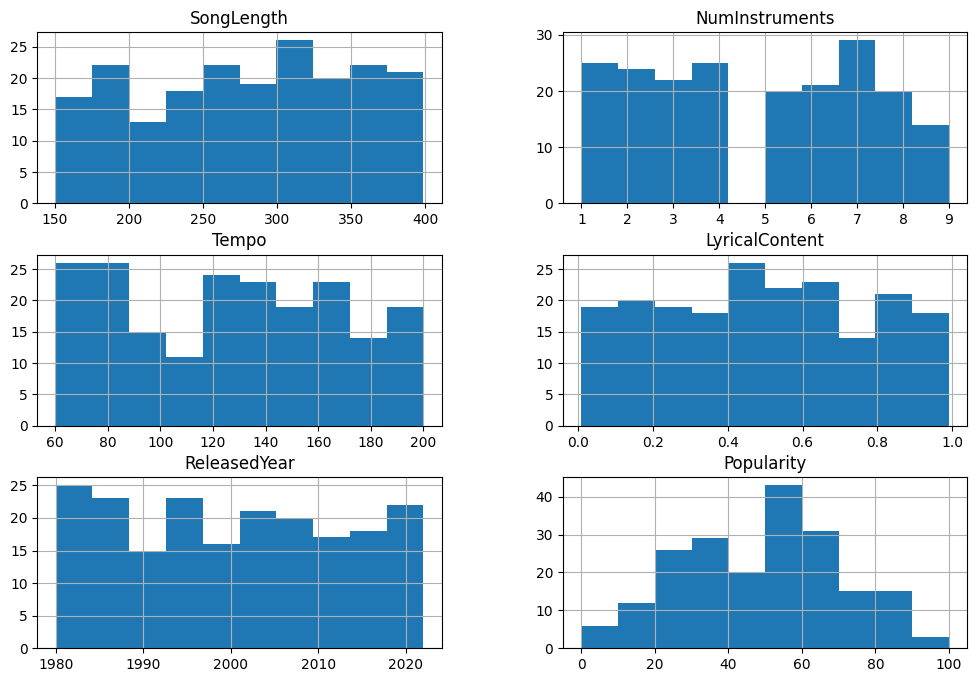

Epoch 1/15
334/334 [==============================] - 2s 3ms/step - loss: 0.5030 - mae: 0.5516
Epoch 2/15
334/334 [==============================] - 1s 4ms/step - loss: 0.2439 - mae: 0.3882
Epoch 3/15
334/334 [==============================] - 1s 4ms/step - loss: 0.2068 - mae: 0.3553
Epoch 4/15
334/334 [==============================] - 1s 3ms/step - loss: 0.1748 - mae: 0.3280
Epoch 5/15
334/334 [==============================] - 1s 3ms/step - loss: 0.1666 - mae: 0.3179
Epoch 6/15
334/334 [==============================] - 1s 2ms/step - loss: 0.1587 - mae: 0.3095
Epoch 7/15
334/334 [==============================] - 1s 3ms/step - loss: 0.1456 - mae: 0.3004
Epoch 8/15
334/334 [==============================] - 1s 2ms/step - loss: 0.1389 - mae: 0.2916
Epoch 9/15
334/334 [==============================] - 1s 3ms/step - loss: 0.1326 - mae: 0.2863
Epoch 10/15
334/334 [==============================] - 1s 3ms/step - loss: 0.1213 - mae: 0.2736
Epoch 11/15
334/334 [============================

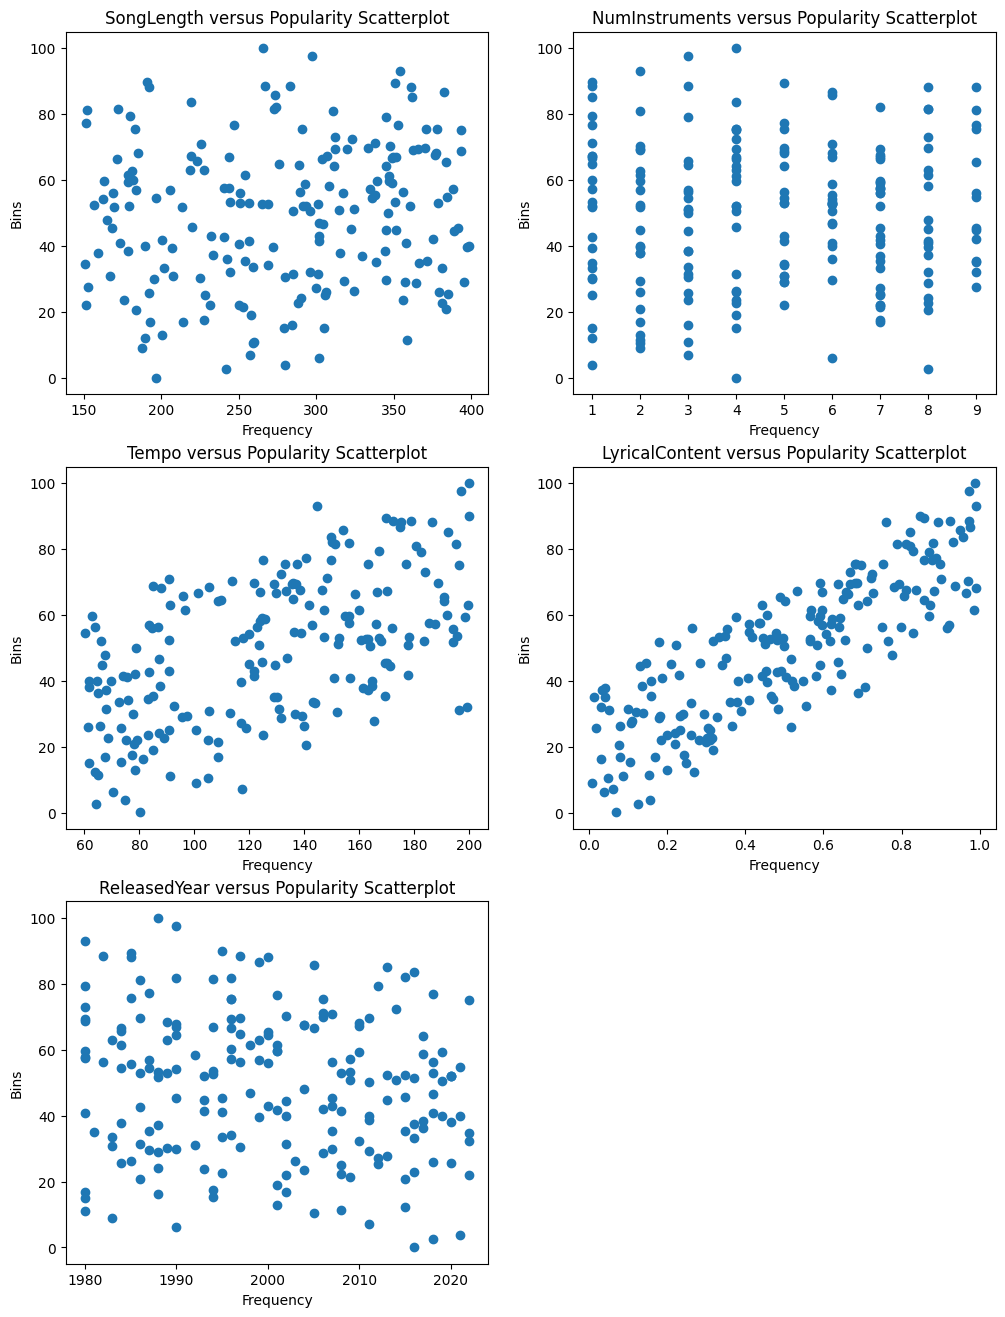

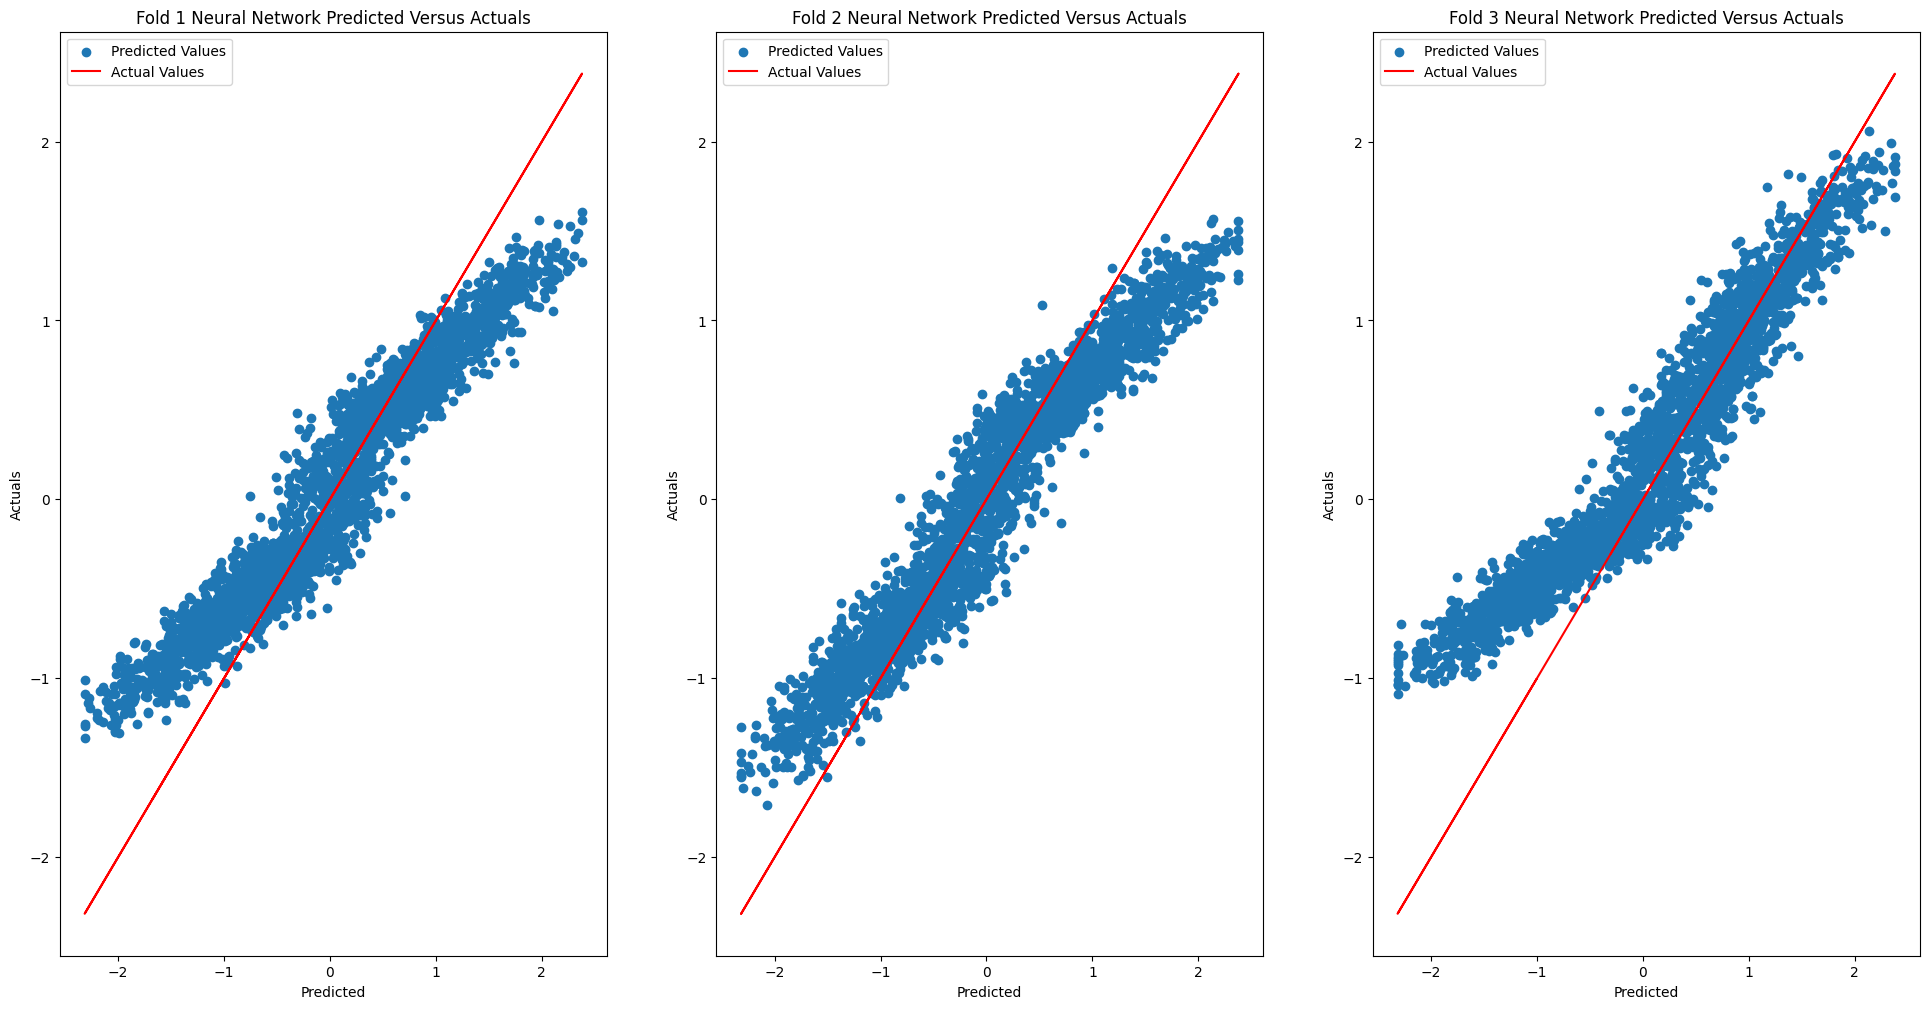

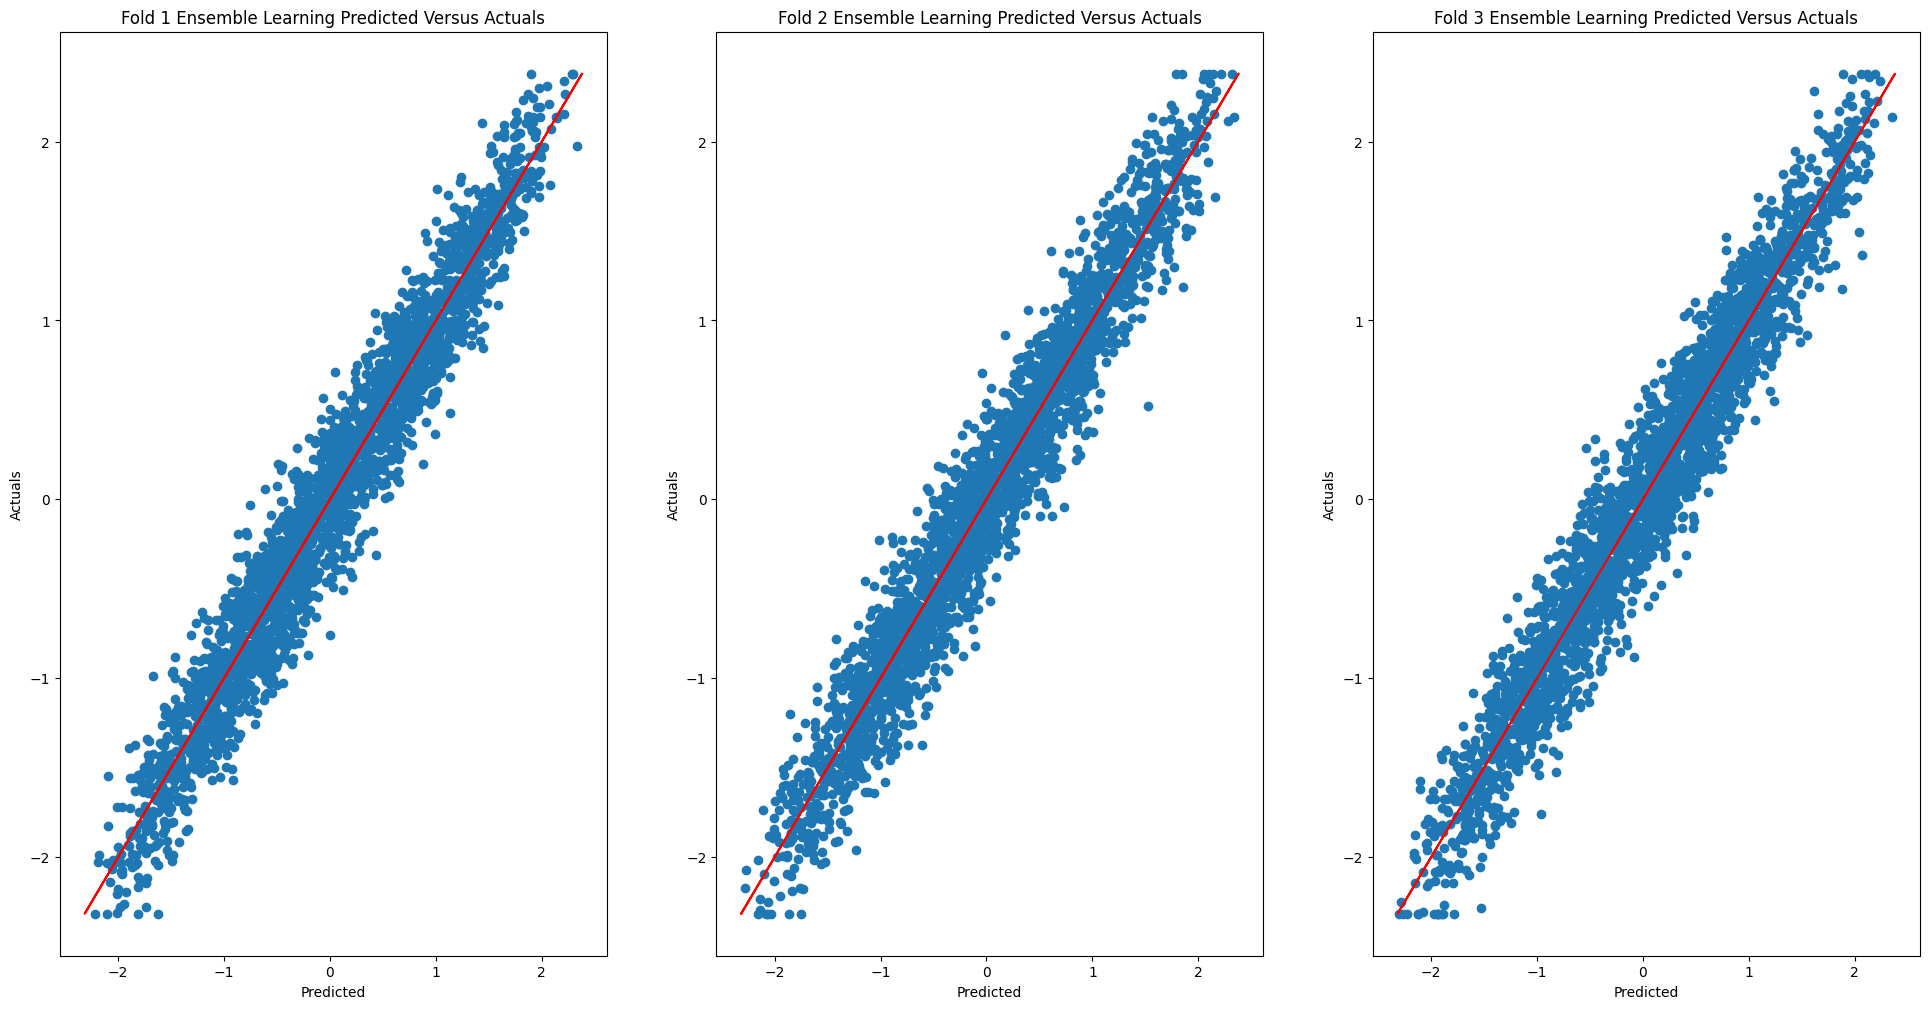

In [ ]:
%matplotlib inline
# do the imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.ensemble import BaggingRegressor
import seaborn as sns
from keras.optimizers import SGD

def exploratory(path):

    # read in the data from the provided path argument
    data = pd.read_csv(path)
    # reduce the size by using the sample method
    # will maintain the distribuition so that the visualizations are more readable
    data = data.sample(frac=.025, random_state=42)

    # make the histograms but drop the genre column
    data.drop(columns=['Genre']).hist(figsize=(12, 8))
    plt.show()

    # seperate the features from the target popularity value
    features = data.drop(columns=['Popularity', 'Genre'])
    target = data['Popularity']

    # get the rows and columns we want
    rows = 3
    cols = 2
    fig, axes = plt.subplots(3, 2, figsize=(12, 16))

    # flatten the axes array so that we can access them as we iterate through
    axes = axes.flatten()

    axes[5].axis('off')
    # iterate through the enumeration of the columns so that we can plot each
    # of the features we got
    column_names = features.columns
    for i, column in enumerate(column_names):
      axis = axes[i]
      axis.scatter(data[column], data['Popularity'])
      axis.set_title(f"{column} versus Popularity Scatterplot")
      axis.set_xlabel('Frequency')
      axis.set_ylabel('Bins')

def evaluate(actuals, predicted):
  MSE = []
  MAE = []

  for i, fold in enumerate(predicted):
    MAE.append(mean_absolute_error(actuals[i], fold))
    MSE.append(mean_squared_error(actuals[i], fold))

  for i, value in enumerate(MAE):
    print(f"Fold {i}:")
    print(f'MAE: {MAE[i]}')
    print(f'MAE: {MSE[i]}')
    print('-----')

def plotResults(actuals, NN_predicted, EN_predicted):
  rows = 1
  cols = 3

  fig, axes = plt.subplots(rows, cols, figsize=(24, 12))
  axes = axes.flatten()

  for i in range(cols):
    axis = axes[i]
    axis.scatter(actuals[i], NN_predicted[i], label = 'Predicted Values')
    axis.plot(actuals[i], actuals[i], color = 'red', label = 'Actual Values')

    axis.set_title(f"Fold {i+1} Neural Network Predicted Versus Actuals")
    axis.set_xlabel('Predicted')
    axis.set_ylabel('Actuals')
    axis.legend()

  fig2, axes2 = plt.subplots(rows, cols, figsize=(24, 12))
  axes2 = axes2.flatten()

  for i in range(cols):
    axis2 = axes2[i]
    axis2.scatter(EN_predicted[i], actuals[i])
    axis2.plot(actuals[i], actuals[i], color = 'red', label = 'Actual Values')

    axis2.set_title(f"Fold {i+1} Ensemble Learning Predicted Versus Actuals")
    axis2.set_xlabel('Predicted')
    axis2.set_ylabel('Actuals')
    axis.legend()

# function that creates our model
def createRegressionNetwork(hidden_layer_combinations):
  model = tf.keras.models.Sequential()

  model.add(Dense(32, activation="relu", input_shape=(6,)))
  model.add(Dropout(0.3))

  for layer in hidden_layer_combinations:
    model.add(Dense(layer, activation='relu'))
    model.add(Dropout(0.3))

  model.add(Dense(1, activation='linear'))

  # compile with MSE as the loss
  # adam and mae as a metric
  model.compile(
      optimizer = SGD(),
      loss = "mean_squared_error",
      metrics = ['mae']
  )
  return model

# Tuning functin
# will take the feats/targets and iterate
# through different combinations and print the best ones!
def tuning(features, target):
    neuron_amounts = [32, 64, 128]
    layers_min = 3
    layers_max = 5
    # make the combinations
    combinations = []
    for layer_amount in range(layers_min, layers_max+1):
      for neuron_amount in neuron_amounts:
        current = []
        for i in range(0, layer_amount):
          current.append(neuron_amount)
        combinations.append(current)
    # test and train splits
    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.1, random_state=1, shuffle=True)
    evaluations = []

    # evaluate each one!
    for combination in combinations:
      model = createRegressionNetwork(combination)
      history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split = .2)
      evaluations.append(model.evaluate(x_test, y_test))
    # print results
    for i, combination in enumerate(combinations):
      print(f"Combination {i+1}")
      print(evaluations[i])
      print(combinations[i])

def training_eval(features, target):
    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.1, random_state=1, shuffle=True)

    model = createRegressionNetwork([128,128,128])
    history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split = .2)


    plt.figure()
    epochs = range(1, 51)
    plt.plot(epochs, history.history['loss'], 'b-', label='Training Loss')
    plt.plot(epochs, history.history['val_loss'], 'r-', label='Validation Loss')
    plt.plot(epochs, history.history['mae'], 'g-', label='Training MAE')
    plt.plot(epochs, history.history['val_mae'], 'y-', label='Validation MAE')
    plt.title("Loss and MAE History")
    plt.xlabel("Epoch")
    plt.ylabel("Loss/MAE")
    plt.legend()

# MAIN
# EDA function call-----------------------------------------
exploratory(r'/content/sample_data/train.csv')

# read in the data into a data frame and print
raw_data = pd.read_csv(r'/content/sample_data/train.csv')
# print(raw_data.head())

# assert that the flag is equal to false so that there are no nulls
# nulls will negatively impact the nerual network
null_flag = raw_data.isnull().any().any()
assert null_flag == False

# DATA PREPROCESSING AND SCALING----------------------------
features = raw_data.drop(columns=['Popularity', 'Genre']).values
genre = raw_data['Genre'].values
popularity_value = raw_data['Popularity'].values
# do encodings for the genres
label_encoder = LabelEncoder()
encoded_genres = label_encoder.fit_transform(genre)
# scale the features
scalar = StandardScaler()
scalar.fit(features)
features_scaled = scalar.transform(features)
# scale the popularity scores
scalar.fit(popularity_value.reshape(-1, 1))
popularity_scaled = scalar.transform(popularity_value.reshape(-1, 1))
# combine the encoded genres to the rest of the features
combined_features = np.column_stack((features_scaled, encoded_genres))

# PARAMETER TUNING---------------------------------------------
#tuning(combined_features, popularity_scaled)
#training_eval(combined_features, popularity_scaled)

# FINAL REGRESSION
# make the kfold object, we will do a 3 fold cross validation
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
NN_histories = []
NN_preds = []
actuals = []
ensemble_preds = []
# passing the scaled data to the kfold split
# we can iterate through the train/test indexes
for train_idx, test_idx in kfold.split(popularity_scaled):

    # seperate the x from the y
    x_train, x_test = combined_features[train_idx], combined_features[test_idx]
    y_train, y_test = popularity_scaled[train_idx], popularity_scaled[test_idx]
    actuals.append(y_test)

    # create the regressive nerual network and fit the model
    model = createRegressionNetwork([128, 128, 128])
    history = model.fit(x_train, y_train, epochs=15, batch_size=16)
    predictions = model.predict(x_test)

    NN_histories.append(history)
    NN_preds.append(predictions)

    model = BaggingRegressor(n_estimators=10, random_state = 42, estimator=LinearRegression())
    model.fit(x_train, y_train.ravel())
    predictions2 = model.predict(x_test)

    ensemble_preds.append(predictions2)

# PLOT THE RESULTS-----------------------------------------
plotResults(actuals, NN_preds, ensemble_preds)

# CALCULATE EVALUATION METRICS-----------------------------
print('Nerual Network Evaluations:')
evaluate(actuals, NN_preds)

print('Ensemble Learning Evaluations')
evaluate(actuals, ensemble_preds)